In [48]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_890322509a13487083c7334c336cfd5d = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_890322509a13487083c7334c336cfd5d = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'
    
client_bf62572b902643f99af220ee4081858a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ua3oGGSQQET-8xMbadCrGV2P_izX6cW3jPMnqn4-Phi-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_bf62572b902643f99af220ee4081858a.get_object(Bucket='smartbridgedeployment-donotdelete-pr-f5kg3syxpkfm0u', Key='household_power_consumption.txt')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body,sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
dataset.head()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.000          1.000   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [50]:
dataset.tail()

Global_active_power Global_reactive_power Voltage  \
datetime                                                                
2010-11-26 20:58:00               0.946                   0.0  240.43   
2010-11-26 20:59:00               0.944                   0.0   240.0   
2010-11-26 21:00:00               0.938                   0.0  239.82   
2010-11-26 21:01:00               0.934                   0.0   239.7   
2010-11-26 21:02:00               0.932                   0.0  239.55   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2010-11-26 20:58:00              4.0            0.0            0.0   
2010-11-26 20:59:00              4.0            0.0            0.0   
2010-11-26 21:00:00              3.8            0.0            0.0   
2010-11-26 21:01:00              3.8            0.0            0.0   
2010-11-26 21:02:00              3.8            0.0            0.0   

                     Sub_metering_3  
datetime                             
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0

In [51]:
dataset.describe()

Sub_metering_3
count    2.049280e+06
mean     6.458447e+00
std      8.437154e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01

In [52]:
dataset.shape

(2075259, 7)

In [53]:
dataset.isnull().any() #checking for null values

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [54]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [55]:
#understanding percentage of data missing
percent_missing=(dataset.isnull().sum())*100/len(dataset)
missing_value_df=pd.DataFrame({'percent_missing':percent_missing})
missing_value_df

percent_missing
Global_active_power           0.000000
Global_reactive_power         0.000000
Voltage                       0.000000
Global_intensity              0.000000
Sub_metering_1                0.000000
Sub_metering_2                0.000000
Sub_metering_3                1.251844

In [56]:
#Displaying first five null values of sub metering 3. 
dataset.loc[dataset.Sub_metering_3.isnull()].head()

Global_active_power Global_reactive_power Voltage  \
datetime                                                                
2006-12-21 11:23:00                   ?                     ?       ?   
2006-12-21 11:24:00                   ?                     ?       ?   
2006-12-30 10:08:00                   ?                     ?       ?   
2006-12-30 10:09:00                   ?                     ?       ?   
2007-01-14 18:36:00                   ?                     ?       ?   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-21 11:23:00                ?              ?              ?   
2006-12-21 11:24:00                ?              ?              ?   
2006-12-30 10:08:00                ?              ?              ?   
2006-12-30 10:09:00                ?              ?              ?   
2007-01-14 18:36:00                ?              ?              ?   

                     Sub_metering_3  
datetime                             
2006-12-21 11:23:00             NaN  
2006-12-21 11:24:00             NaN  
2006-12-30 10:08:00             NaN  
2006-12-30 10:09:00             NaN  
2007-01-14 18:36:00             NaN

In [57]:
#replace(x,y ) is used to replace x with y. Here, we are replacing ‘?’ with ‘NaN’ values.
dataset.replace('?',np.nan,inplace=True)
dataset.loc[dataset.Sub_metering_3.isnull()].head() #Displaying null values after replacing ‘?’ with ‘NaN’. 

Global_active_power Global_reactive_power Voltage  \
datetime                                                                
2006-12-21 11:23:00                 NaN                   NaN     NaN   
2006-12-21 11:24:00                 NaN                   NaN     NaN   
2006-12-30 10:08:00                 NaN                   NaN     NaN   
2006-12-30 10:09:00                 NaN                   NaN     NaN   
2007-01-14 18:36:00                 NaN                   NaN     NaN   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-21 11:23:00              NaN            NaN            NaN   
2006-12-21 11:24:00              NaN            NaN            NaN   
2006-12-30 10:08:00              NaN            NaN            NaN   
2006-12-30 10:09:00              NaN            NaN            NaN   
2007-01-14 18:36:00              NaN            NaN            NaN   

                     Sub_metering_3  
datetime                             
2006-12-21 11:23:00             NaN  
2006-12-21 11:24:00             NaN  
2006-12-30 10:08:00             NaN  
2006-12-30 10:09:00             NaN  
2007-01-14 18:36:00             NaN

In [58]:
#dropna(how=’all’ ) is used to drop all null values. Now, there are no null values in the dataset.
dataset=dataset.dropna(how='all')
dataset

Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   
...                                 ...                   ...      ...   
2010-11-26 20:58:00               0.946                   0.0   240.43   
2010-11-26 20:59:00               0.944                   0.0    240.0   
2010-11-26 21:00:00               0.938                   0.0   239.82   
2010-11-26 21:01:00               0.934                   0.0    239.7   
2010-11-26 21:02:00               0.932                   0.0   239.55   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.000          1.000   
...                              ...            ...            ...   
2010-11-26 20:58:00              4.0            0.0            0.0   
2010-11-26 20:59:00              4.0            0.0            0.0   
2010-11-26 21:00:00              3.8            0.0            0.0   
2010-11-26 21:01:00              3.8            0.0            0.0   
2010-11-26 21:02:00              3.8            0.0            0.0   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[2049280 rows x 7 columns]

In [59]:
#dataset[i].astype(‘float64’) converts all type of data to float. 
for i in dataset.columns:
    dataset[i]=dataset[i].astype('float64')

In [60]:
#Adding sub_metering_4 value to the dataset.
#We created another submeter value by performing operations on Global_active_power, Sub_metering_1, 
#Sub_metering_2, Sub_metering_3 columns.
values=dataset.values
dataset['Sub_metering_4']=(values[:,0]*1000/60)-(values[:,4]+values[:,5]+values[:,6])

In [61]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [62]:
dataset.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00   
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01   
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01   

       Sub_metering_4  
count    2.049280e+06  
mean     9.314693e+00  
std      9.585916e+00  
min     -2.400000e+00  
25%      3.800000e+00  
50%      5.500000e+00  
75%      1.036667e+01  
max      1.248333e+02

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

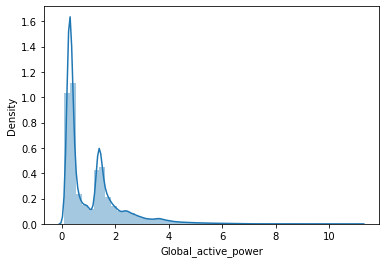

In [63]:
#data visualization
#Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. A distplot plots a univariate distribution of observations.
sns.distplot(dataset['Global_active_power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_reactive_power'>

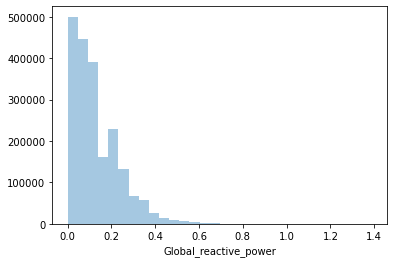

In [64]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Voltage', ylabel='Density'>

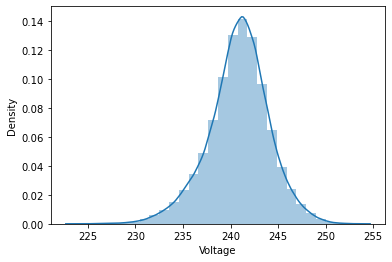

In [65]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_intensity', ylabel='Density'>

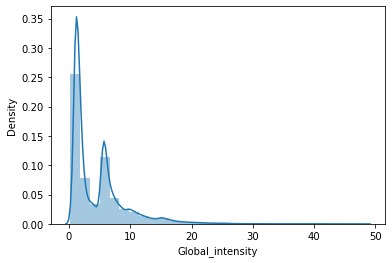

In [66]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

In [67]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
dataset.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   
Sub_metering_4                    0.701380               0.211624 -0.271371   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   
Sub_metering_4                 0.703258        0.125067        0.085201   

                       Sub_metering_3  Sub_metering_4  
Global_active_power          0.638555        0.701380  
Global_reactive_power        0.089617        0.211624  
Voltage                     -0.268172       -0.271371  
Global_intensity             0.626543        0.703258  
Sub_metering_1               0.102571        0.125067  
Sub_metering_2               0.080872        0.085201  
Sub_metering_3               1.000000        0.178724  
Sub_metering_4               0.178724        1.000000

In [68]:
#A heat map (or heatmap) is a graphical representation of data where values are depicted by color. 
#Heat maps make it easy to visualize complex data and understand it at a glance. 
#Here lighter colour means that the columns are highly correlated with our target data.


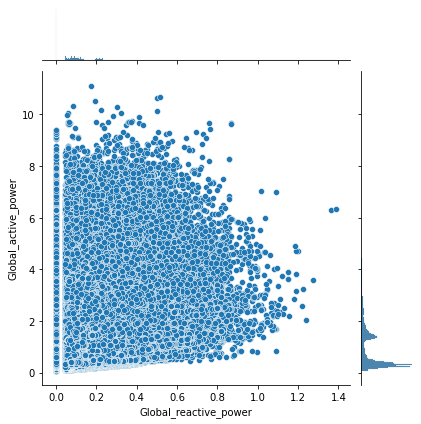

In [69]:
#Seaborn jointplot lets you show a plot of two variables with bivariate and univariate graphs. 
sns.jointplot(x='Global_reactive_power',y='Global_active_power',data=dataset,kind='scatter')

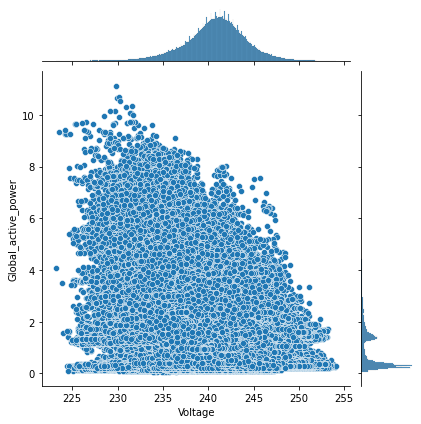

In [70]:
sns.jointplot(x='Voltage',y='Global_active_power',data=dataset,kind='scatter')

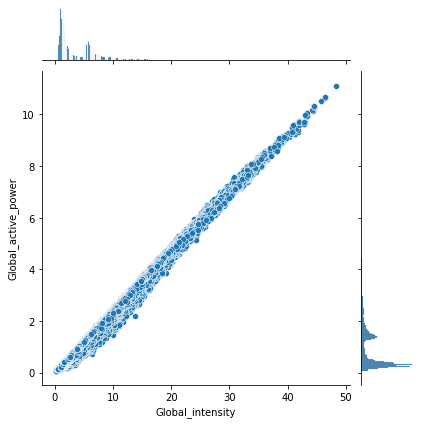

In [71]:
sns.jointplot(x='Global_intensity',y='Global_active_power',data=dataset,kind='scatter')

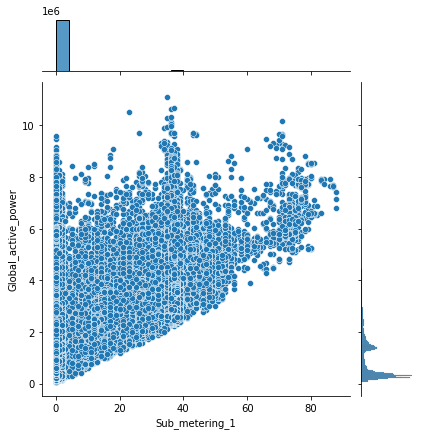

In [72]:
sns.jointplot(x='Sub_metering_1',y='Global_active_power',data=dataset,kind='scatter')

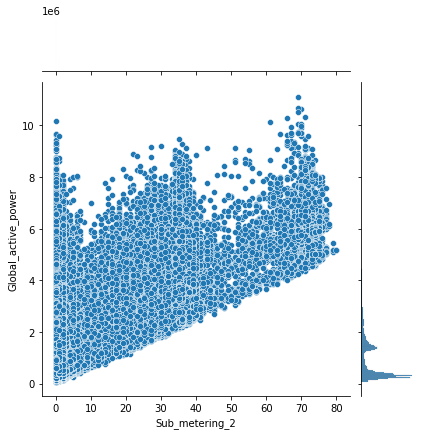

In [73]:
sns.jointplot(x='Sub_metering_2',y='Global_active_power',data=dataset,kind='scatter')

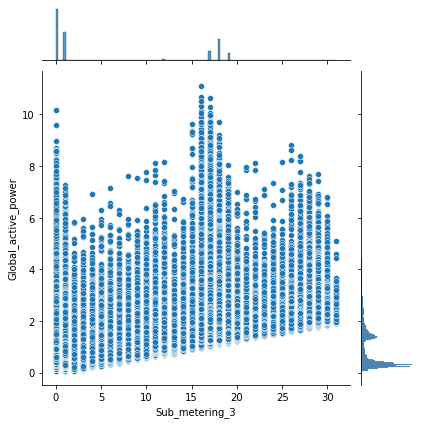

In [74]:
sns.jointplot(x='Sub_metering_3',y='Global_active_power',data=dataset,kind='scatter')

In [75]:
#divide the data into dependent(y) and independent(x)
y=dataset.iloc[:,0].values  #to predict global active power
y

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

In [76]:
y

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

In [77]:
x=dataset.iloc[:,1:7].values #global reactive power,voltage,global intensity value, submeter 1,2,3
x

array([[  0.418, 234.84 ,  18.4  ,   0.   ,   1.   ,  17.   ],
       [  0.436, 233.63 ,  23.   ,   0.   ,   1.   ,  16.   ],
       [  0.498, 233.29 ,  23.   ,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.   , 239.82 ,   3.8  ,   0.   ,   0.   ,   0.   ],
       [  0.   , 239.7  ,   3.8  ,   0.   ,   0.   ,   0.   ],
       [  0.   , 239.55 ,   3.8  ,   0.   ,   0.   ,   0.   ]])

In [78]:
#divide data into train and test
#The split ratio we consider is 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 6)
(614784, 6)
(1434496,)
(614784,)


In [80]:
#training the model using linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [81]:
#use the predict method on the model and pass x_test as a parameter to get the output as y_pred.
#Note that the prediction output is an array of real numbers corresponding to the input array.
predictions=lm.predict(x_test)
predictions

array([3.90011522, 0.6894864 , 0.2517435 , ..., 1.58313767, 0.58079039,
       1.54781793])

In [82]:
y_test

array([3.85 , 0.738, 0.222, ..., 1.562, 0.604, 1.534])

In [83]:
#checking metrics/accuracy of the model using various methods
from sklearn import metrics
print('Mean Absolute Error(MAE)',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error(MSE)',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Square Error (RMSE)',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R^2 Score',metrics.r2_score(y_test,predictions))





Mean Absolute Error(MAE) 0.025902546821856255
Mean Squared Error(MSE) 0.0016528254258486009
Root Mean Square Error (RMSE) 0.04065495573541559
R^2 Score 0.99851567747378


In [84]:
#save the model
#The finalised model is now to be saved. We will be saving the model as a pickle or pkl file.
import pickle  
filename='PCA_model.pkl'
pickle.dump(lm,open(filename,'wb'))

In [85]:
pwd


'/home/wsuser/work'

In [87]:
#deployment
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 26.7 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.208
    Uninstalling ibm-watson-machine-learning-1.0.208:
      Successfully uninstalled ibm-watson-machine-learning-1.0.208


In [88]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np


In [118]:
#Authenticate and Set Space
wml_credentials= {
    "apikey":"RngbIue_enRT-rhbGo48EB5hmd88P3_H1ILnEBsIfnp2",
    "url":"https://us-south.ml.cloud.ibm.com"
}
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
e6f1cc79-bf6b-4089-a318-0b6f544350d0  smartbridge  2022-05-31T07:38:07.218Z
------------------------------------  -----------  ------------------------


In [119]:
SPACE_ID="e6f1cc79-bf6b-4089-a318-0b6f544350d0"

In [120]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [121]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [122]:
#save and deploy the model
import sklearn
sklearn.__version__

'1.0.2'

In [123]:
MODEL_NAME='smartbridge'
DEPLOYMENT_NAME='smartbridge_deployment'
DEMO_MODEL=lm

In [124]:
#set python version
software_spec_uid = wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [125]:
#setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }

In [126]:
#save model
model_details=wml_client.repository.store_model(
    model=lm,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [127]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-05-31T09:20:45.593Z',
  'id': 'aa801f60-a183-472c-a77e-ecddefc48540',
  'modified_at': '2022-05-31T09:20:48.511Z',
  'name': 'smartbridge',
  'owner': 'IBMid-66600268KV',
  'resource_key': '06052a4f-574b-46de-9d8b-89383a9237f6',
  'space_id': '

In [129]:
model_id=wml_client.repository.get_model_id(model_details)

In [130]:
model_id


'aa801f60-a183-472c-a77e-ecddefc48540'

In [131]:
#set meta
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [132]:
#deploy
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'aa801f60-a183-472c-a77e-ecddefc48540' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='85bd17a4-d753-48cd-a4a3-24df84cb1029'
------------------------------------------------------------------------------------------------


